## Experimentation With Different Structural Changes and Their Resulting Effects on the Performance of a Multilayer Perceptron Classifier.
<br>
The MLP classifier is an algorithm that leverages many artificial "neurons" in its construction, configured in multiple layers. We will execute a series of structured, orderly changes and observe the effects on certain metrics, while gaining an intuitive understanding of the results when invoking certain high-level, or "hyper" parameters. We will plot the changes in resulting accuracy as a function of the parameter settings.

In order, we will be running:
- Activation function: **ReLU** / Optimizer: **Adam** algorithm.
- Activation function: **ReLU** / Optimizer: **Stochastic Gradient Descent**
- Activation function: **ReLU** / Optimizer: **Stochastic Gradient Descent** with Adaptive Learning Rate
- Activation function: **Tanh** / Optimizer: **Adam** algorithm.
- Activation function: **Tanh** / Optimizer: **Stochastic Gradient Descent**

Our implementation of these models will all use Softmax regression at the output layer, similar to Logistic Regression, but giving us multiple discrete classes instead of only 2 - in our case we have 10 output neurons corresponding to each class of digit. With softmax, the sum of the values of the 10 output neurons will be normalized to total 1.0, with one neuron having a clear probabilistic winner - indicating the consensus answer of the model.

Each iteration of the above settings will be run with different numbers of hidden layers, from 1 to 9: *L1 = 200, L2 = 500, L3 = 500, L4 = 400, L5 = 300, L6 = 200, L7 = 200, L8 = 100, and L9 = 100.*

We will initially be using a smaller subset of the famous MNIST handwritten digits dataset, consisting of 1,797 observations, each comprised of a 64-dimensional vector representing pixel values of the handwritten digits from 0 to 9, each as a greyscale raster image. After running these 5 experiments, We will choose the best performing model to apply the full MNIST handwritten digits dataset consisting of a training set of 60,000 examples, and a test set of 10,000 samples, each comprised of a 784-dimensional vector representing pixel values. More information may be found on [The MNIST Handwritten Digit Database.](http://yann.lecun.com/exdb/mnist/)

We will use NumPy arrays as our primary data structure, and the Sci-kit Learn implementation of the MLP Classifier for our calculations. The NumPy arrays are true, contiguous memory arrays, able to be accessed in constant O(1) time, and are efficiently used for large matrix calculations such as needed for an artificial neural network. 

We will begin by instantiating the MLP Classifier. Each neuron in the input layer will correspond to a pixel of the original input raster image. There are numerous hyperparameters to be set when setting up an MLP, we will be primarily interested in the following:
- *activation*: The activation function at each neuron, producing its output as as the mapping of a continuous real number to a range of 0 to 1 (with ReLU) or from -1 to 1 (with tanh).
- *hidden_layer_sizes*: The number of neurons per layer, each number in this tuple corresponds to the particular layer in the order given. 
- *solver*: The solver is the optimizer that seeks to perform the minimization of the loss function, we will be using the Adam, which is a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba, and we will also later be using the 'classic' stochastic gradient descent algorithm. With our implementation of the MLP, the loss function is cross-entropy. 
- *learning_rate*: We will use both the constant and the adaptive learning rate options, which can either move toward a local optimum by a fixed numerical amount with each training step, or reduce the amount as the loss becomes smaller as the training steps increase.
- *random_state*: We will set the random state to 123, enabling us to reproduce our state with each run of the algorithm, giving us meaningful, reproducible results.
- *verbose*: At the last step, we will allow the output of the training steps to be displayed, giving visibility to the loss amount and training iteration with each training step.

In [61]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [62]:
mnist_data = load_digits()

In [63]:
mnist_data.data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [64]:
print(mnist_data.data.shape)
print(mnist_data.target.shape)

(1797, 64)
(1797,)


Perform a random split of our dataset into a training and testing set. The ratio used is 0.75 for the training set and 0.25 for testing.

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(mnist_data.data, mnist_data.target)

In [66]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1347, 64)
(1347,)
(450, 64)
(450,)


Create a list of hidden layer sizes that we will iteratively use over each of our models. Each model will be run with 1 through 9 hidden layers, and the resulting accuracy and confusion matrices will be stored.

In [67]:
# with the relu activation function and Adam optimizer:
# we will try in order 200, 500, 500, 400, 300, 200, 200, 100, 100
hidden_layer_list = [(200,), 
                     (200, 500), 
                     (200, 500, 500), 
                     (200, 500, 500, 400), 
                     (200, 500, 500, 400, 300), 
                     (200, 500, 500, 400, 300, 200), 
                     (200, 500, 500, 400, 300, 200, 200), 
                     (200, 500, 500, 400, 300, 200, 200, 100), 
                     (200, 500, 500, 400, 300, 200, 200, 100, 100)]
running_accuracy = []
running_recall = []
running_confusion = {}

### Instantiate model 1. 
- Activation function: ReLU
- Optimizer: Adam
- Learning rate: constant

In [68]:
for i in range(9):
    mlp_classifier1 = MLPClassifier(hidden_layer_sizes=hidden_layer_list[i], 
                                activation='relu',
                                solver='adam', 
                                alpha=0.0001, 
                                batch_size='auto', 
                                learning_rate='constant', 
                                learning_rate_init=0.001, 
                                power_t=0.5, 
                                max_iter=200, 
                                shuffle=True, 
                                random_state=123, 
                                tol=0.0001, 
                                verbose=False, 
                                warm_start=False, 
                                momentum=0.9, 
                                nesterovs_momentum=True, 
                                early_stopping=False, 
                                validation_fraction=0.1, 
                                beta_1=0.9, 
                                beta_2=0.999, 
                                epsilon=1e-08)
    
    mlp_classifier1.fit(X_train, Y_train)
    
    y_hat = mlp_classifier1.predict(X_test)
    running_accuracy.append(accuracy_score(Y_test, y_hat))
    #running_recall.append(recall_score(Y_test, y_hat))
    running_confusion[i] = confusion_matrix(Y_test, y_hat)

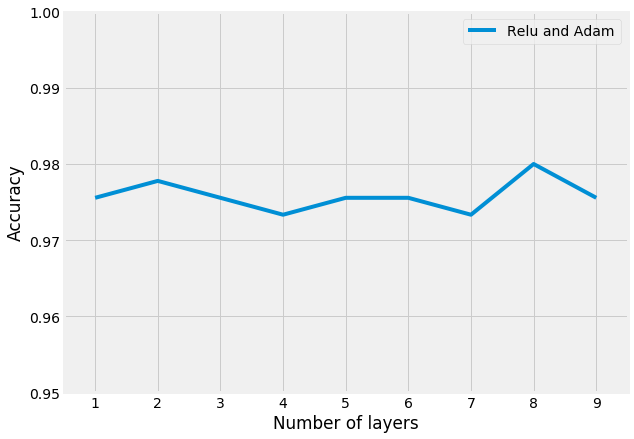

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(9, 7))
plt.style.use('fivethirtyeight')
x_units = [1, 2, 3, 4, 5, 6, 7, 8, 9]
plt.plot(x_units, running_accuracy, label='Relu and Adam')
#plt.plot(x_units, running_recall, label='recall', c='r', alpha=0.7)
plt.axis([0.5, 9.5, 0.95, 1.0])
plt.xlabel('Number of layers')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

We see that the overall accuracy has remained relatively high, with no apparent upward or downward trend visible. The accuracy peaks at 8 hidden layers. Looking at the confusion matrix, we see that the digits 1 and 8 have been misclassified more than the others, as well as 9 and 5. 

In [70]:
running_confusion[3]

array([[46,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 44,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 44,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 40,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 53,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 45,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 35,  0],
       [ 0,  0,  0,  1,  0,  2,  0,  0,  1, 57]])

### Instantiate model 2. 
- Activation function: ReLU
- Optimizer: Stochastic Gradient Descent
- Learning rate: constant

In [71]:
# with the relu activation function and SGD optimizer:
running_accuracy2 = []
running_confusion2 = {}
for i in range(9):
    mlp_classifier1 = MLPClassifier(hidden_layer_sizes=hidden_layer_list[i], 
                                activation='relu',
                                solver='sgd', 
                                alpha=0.0001, 
                                batch_size='auto', 
                                learning_rate='constant', 
                                learning_rate_init=0.001, 
                                power_t=0.5, 
                                max_iter=200, 
                                shuffle=True, 
                                random_state=123, 
                                tol=0.0001, 
                                verbose=False, 
                                warm_start=False, 
                                momentum=0.9, 
                                nesterovs_momentum=True, 
                                early_stopping=False, 
                                validation_fraction=0.1, 
                                beta_1=0.9, 
                                beta_2=0.999, 
                                epsilon=1e-08)
    
    mlp_classifier1.fit(X_train, Y_train)
    
    y_hat = mlp_classifier1.predict(X_test)
    running_accuracy2.append(accuracy_score(Y_test, y_hat))
    running_confusion2[i] = confusion_matrix(Y_test, y_hat)

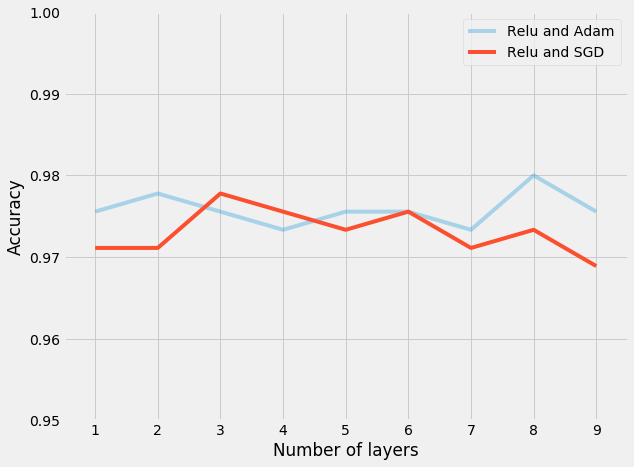

In [72]:
plt.figure(figsize=(9, 7))
plt.style.use('fivethirtyeight')
x_units = [1, 2, 3, 4, 5, 6, 7, 8, 9]
plt.plot(x_units, running_accuracy, label='Relu and Adam', alpha=0.3)
plt.plot(x_units, running_accuracy2, label='Relu and SGD')
plt.axis([0.5, 9.5, 0.95, 1.0])
plt.xlabel('Number of layers')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Model 2 shows an accuracy score peaking at 3 hidden layers, and trending downward after 3. The accuracy rises quickly after the initial 1 layer, then steadily decreases after a peak at 3. Looking at the confusion matrix, we see that the 1 and 8, and the 5 and 9 are still being misclassified at a slightly higher rate than the others. 

In [73]:
running_confusion2[2]

array([[46,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 44,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 44,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 40,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 53,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 46,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 35,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  1, 58]])

### Instantiate model 3. 
- Activation function: ReLU
- Optimizer: Stochastic Gradient Descent
- Learning rate: adaptive

In [74]:
# with the relu activation function and SGD optimizer and adaptive:
running_accuracy3 = []
running_confusion3 = {}
for i in range(9):
    mlp_classifier1 = MLPClassifier(hidden_layer_sizes=hidden_layer_list[i], 
                                activation='relu',
                                solver='sgd', 
                                alpha=0.0001, 
                                batch_size='auto', 
                                learning_rate='adaptive', 
                                learning_rate_init=0.001, 
                                power_t=0.5, 
                                max_iter=200, 
                                shuffle=True, 
                                random_state=123, 
                                tol=0.0001, 
                                verbose=False, 
                                warm_start=False, 
                                momentum=0.9, 
                                nesterovs_momentum=True, 
                                early_stopping=False, 
                                validation_fraction=0.1, 
                                beta_1=0.9, 
                                beta_2=0.999, 
                                epsilon=1e-08)
    
    mlp_classifier1.fit(X_train, Y_train)
    
    y_hat = mlp_classifier1.predict(X_test)
    running_accuracy3.append(accuracy_score(Y_test, y_hat))
    running_confusion3[i] = confusion_matrix(Y_test, y_hat)

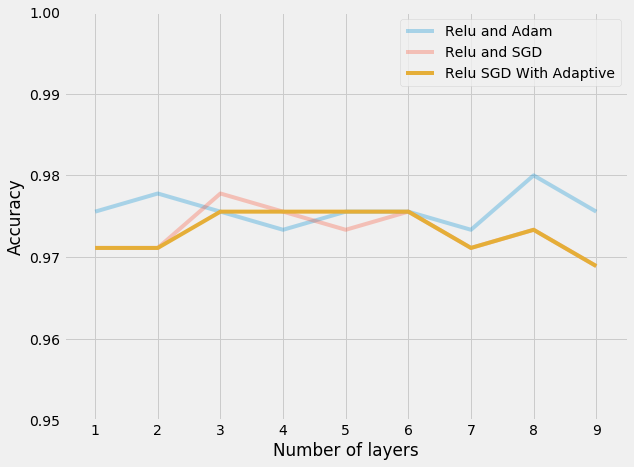

In [75]:
plt.figure(figsize=(9, 7))
plt.style.use('fivethirtyeight')
x_units = [1, 2, 3, 4, 5, 6, 7, 8, 9]
plt.plot(x_units, running_accuracy, label='Relu and Adam', alpha=0.3)
plt.plot(x_units, running_accuracy2, label='Relu and SGD', alpha=0.3)
plt.plot(x_units, running_accuracy3, label='Relu SGD With Adaptive')
plt.axis([0.5, 9.5, 0.95, 1.0])
plt.xlabel('Number of layers')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

As with model 1, we see that model 3 shows a relatively high level of accuracy with no apparent upward or downward trends. There may be a slight dip at the end of the graph after 6 hidden layers, although it appears to be a minimal amount. Looking at the confusion matrix, again the 1 and 8, along with the 5 and 9 digits are still showing a slight increase in misclassification over the others.

In [77]:
running_confusion3[2]

array([[46,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 44,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 44,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 40,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  1, 52,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 46,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 35,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  1, 58]])

### Instantiate model 4. 
- Activation function: hyperbolic tangent
- Optimizer: Adam
- Learning rate: constant

In [78]:
# with the tanh activation function and Adam optimizer:
running_accuracy4 = []
running_confusion4 = {}
for i in range(9):
    mlp_classifier1 = MLPClassifier(hidden_layer_sizes=hidden_layer_list[i], 
                                activation='tanh',
                                solver='adam', 
                                alpha=0.0001, 
                                batch_size='auto', 
                                learning_rate='constant', 
                                learning_rate_init=0.001, 
                                power_t=0.5, 
                                max_iter=200, 
                                shuffle=True, 
                                random_state=123, 
                                tol=0.0001, 
                                verbose=False, 
                                warm_start=False, 
                                momentum=0.9, 
                                nesterovs_momentum=True, 
                                early_stopping=False, 
                                validation_fraction=0.1, 
                                beta_1=0.9, 
                                beta_2=0.999, 
                                epsilon=1e-08)
    
    mlp_classifier1.fit(X_train, Y_train)
    
    y_hat = mlp_classifier1.predict(X_test)
    running_accuracy4.append(accuracy_score(Y_test, y_hat))
    running_confusion4[i] = confusion_matrix(Y_test, y_hat)

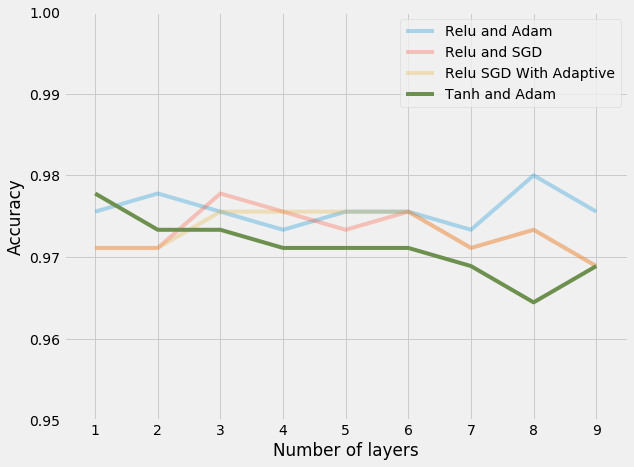

In [79]:
plt.figure(figsize=(9, 7))
plt.style.use('fivethirtyeight')
x_units = [1, 2, 3, 4, 5, 6, 7, 8, 9]
plt.plot(x_units, running_accuracy, label='Relu and Adam', alpha=0.3)
plt.plot(x_units, running_accuracy2, label='Relu and SGD', alpha=0.3)
plt.plot(x_units, running_accuracy3, label='Relu SGD With Adaptive', alpha=0.3)
plt.plot(x_units, running_accuracy4, label='Tanh and Adam')
plt.axis([0.5, 9.5, 0.95, 1.0])
plt.xlabel('Number of layers')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Model 4 shows a much clearer trend than the other three, as the accuracy has peaked at the initial running of 1 hidden layer, and trending downward after, reaching a low at 8 hidden layers. Looking at the confusion matrix, we see that the digits 1 and 8, and the 5 and 9 again show a slightly higher rate of misclassification.

In [80]:
running_confusion4[0]

array([[46,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 44,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 40,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 54,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 46,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 35,  0],
       [ 0,  0,  0,  0,  0,  3,  0,  0,  0, 58]])

### Instantiate model 5. 
- Activation function: hyperbolic tangent
- Optimizer: Stochastic Gradient Descent
- Learning rate: constant

In [81]:
# with the tanh activation function and SGD optimizer:
running_accuracy5 = []
running_confusion5 = {}
for i in range(9):
    mlp_classifier1 = MLPClassifier(hidden_layer_sizes=hidden_layer_list[i], 
                                activation='tanh',
                                solver='sgd', 
                                alpha=0.0001, 
                                batch_size='auto', 
                                learning_rate='constant', 
                                learning_rate_init=0.001, 
                                power_t=0.5, 
                                max_iter=200, 
                                shuffle=True, 
                                random_state=123, 
                                tol=0.0001, 
                                verbose=False, 
                                warm_start=False, 
                                momentum=0.9, 
                                nesterovs_momentum=True, 
                                early_stopping=False, 
                                validation_fraction=0.1, 
                                beta_1=0.9, 
                                beta_2=0.999, 
                                epsilon=1e-08)
    
    mlp_classifier1.fit(X_train, Y_train)
    
    y_hat = mlp_classifier1.predict(X_test)
    running_accuracy5.append(accuracy_score(Y_test, y_hat))
    running_confusion5[i] = confusion_matrix(Y_test, y_hat)

/home/ericnewnam/anaconda3/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


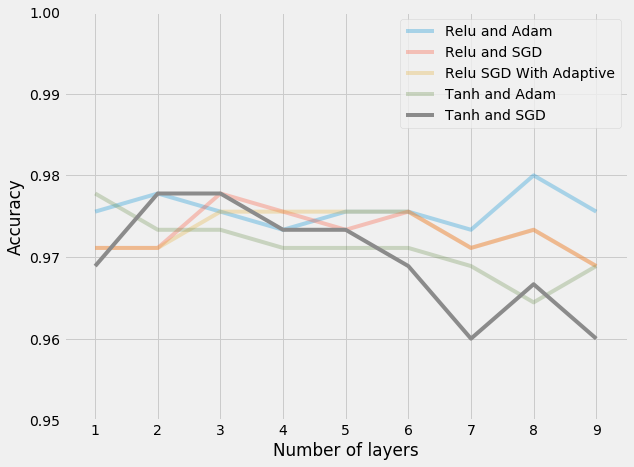

In [82]:
plt.figure(figsize=(9, 7))
plt.style.use('fivethirtyeight')
x_units = [1, 2, 3, 4, 5, 6, 7, 8, 9]
plt.plot(x_units, running_accuracy, label='Relu and Adam', alpha=0.3)
plt.plot(x_units, running_accuracy2, label='Relu and SGD', alpha=0.3)
plt.plot(x_units, running_accuracy3, label='Relu SGD With Adaptive', alpha=0.3)
plt.plot(x_units, running_accuracy4, label='Tanh and Adam', alpha=0.3)
plt.plot(x_units, running_accuracy5, label='Tanh and SGD')
plt.axis([0.5, 9.5, 0.95, 1.0])
plt.xlabel('Number of layers')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Above we see that model 5 has reached an early peak with a moderate number of layers, 2 and 3, then steadily declining afterward, reaching a low at 7 or 9 hidden layers. With model 5, we see that the trend is appearing much more clearly, as the optimization and activation functions do have a relatively strong effect on the resulting accuracy. With model 5, we may be seeing an overall trend of the Stochastic Gradient Descent algorithm producing a poorer classifier as the number of layers increases, as the models all seem to show that a moderate (< 4) number of hidden layers is ideal. Looking at the confusion matrix, again the digits 1 and 8, along with the digits 5 and 9 are misclassified more than the others.

In [83]:
running_confusion5[1]

array([[46,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 44,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 44,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 40,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 53,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 46,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 35,  0],
       [ 0,  0,  0,  0,  0,  3,  0,  0,  0, 58]])

We will now import the full MNIST dataset, consisting of 60,000 training observations and 10,000 testing observations. The label is column 1, and the other 784 columns are the pixel values, corresponding to the flatteneing of a 28 x 28 pixel image.

In [85]:
# import the true MNIST dataset and run the numbers with our optimal model
mnist_train = np.genfromtxt('MNIST_data/mnist_train.csv', delimiter=',')
print('Label:', mnist_train[0, 0])
mnist_train[0:5, 1:]

Label: 5.0


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [86]:
mnist_test = np.genfromtxt('MNIST_data/mnist_test.csv', delimiter=',')
mnist_test[0:5, :]

array([[ 7.,  0.,  0., ...,  0.,  0.,  0.],
       [ 2.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 4.,  0.,  0., ...,  0.,  0.,  0.]])

In [87]:
print(mnist_train.shape)
print(mnist_test.shape)

(60000, 785)
(10000, 785)


Now we separate the label from the other features, and put them into the set called Y:

In [88]:
X_train = mnist_train[:, 1:]
Y_train = mnist_train[:, 0]
X_test = mnist_test[:, 1:]
Y_test = mnist_test[:, 0]

In [89]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


### Instantiate model 6 - full dataset.
- 8 hidden layers
- Activation function: ReLU
- Optimizer: Adam
- Learning rate: constant

In [90]:
# relu activation function with the Adam optimizer and constant learning rate is optimal
# rescale the layer sizes to reflect the larger true MNIST feature vector
# --> use the 8 hidden layers configuration but scaled larger
mlp_classifier_relu_adam = MLPClassifier(hidden_layer_sizes=(800, 1000, 1000, 800, 700, 700, 500, 200), 
                                         activation='relu', 
                                         solver='adam', 
                                         alpha=0.0001, 
                                         batch_size='auto', 
                                         learning_rate='constant', 
                                         learning_rate_init=0.001, 
                                         power_t=0.5, 
                                         max_iter=200, 
                                         shuffle=True, 
                                         random_state=123, 
                                         tol=0.0001, 
                                         verbose=True, 
                                         warm_start=False, 
                                         momentum=0.9, 
                                         nesterovs_momentum=True, 
                                         early_stopping=False, 
                                         validation_fraction=0.1, 
                                         beta_1=0.9, 
                                         beta_2=0.999, 
                                         epsilon=1e-08)

In [91]:
mlp_classifier_relu_adam.fit(X_train, Y_train)

Iteration 1, loss = 0.68377686
Iteration 2, loss = 0.11384684
Iteration 3, loss = 0.08996682
Iteration 4, loss = 0.06769182
Iteration 5, loss = 0.05690796
Iteration 6, loss = 0.04792570
Iteration 7, loss = 0.04962504
Iteration 8, loss = 0.04085470
Iteration 9, loss = 0.03821103
Iteration 10, loss = 0.03937470
Iteration 11, loss = 0.03900380
Iteration 12, loss = 0.04079786
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(800, 1000, 1000, 800, 700, 700, 500, 200),
       learning_rate='constant', learning_rate_init=0.001, max_iter=200,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5,
       random_state=123, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

Create predictions based on the trained model and store them as the set y_hat:

In [92]:
y_hat_MNIST_full = mlp_classifier_relu_adam.predict(X_test)

In [93]:
print(classification_report(Y_test, y_hat_MNIST_full))

             precision    recall  f1-score   support

        0.0       0.98      0.99      0.99       980
        1.0       0.99      0.99      0.99      1135
        2.0       0.97      0.98      0.98      1032
        3.0       0.96      0.98      0.97      1010
        4.0       0.98      0.98      0.98       982
        5.0       0.98      0.97      0.97       892
        6.0       0.98      0.98      0.98       958
        7.0       0.97      0.97      0.97      1028
        8.0       0.97      0.96      0.97       974
        9.0       0.98      0.97      0.97      1009

avg / total       0.98      0.98      0.98     10000



The classification report shows an overall good performance, with the average recall at 0.98 and the average precision at 0.98. 

In [94]:
print(confusion_matrix(Y_test, y_hat_MNIST_full))

[[ 972    0    0    0    1    2    3    1    1    0]
 [   0 1125    1    3    0    0    2    1    3    0]
 [   5    1 1013    2    1    0    1    5    4    0]
 [   0    0    6  992    0    4    0    3    3    2]
 [   0    1    3    0  959    0    5    2    3    9]
 [   2    0    0   13    1  866    2    1    3    4]
 [   4    2    0    0    2    5  942    0    3    0]
 [   1    4   11    7    0    0    0 1001    2    2]
 [   5    0    6   10    4    6    1    3  937    2]
 [   1    2    1    2    6    5    1   13    3  975]]


Looking at the confusion matrix, we now see a better representation of the misclassified digits, with the granularity becoming much more fine with the full 10,000 testing observations. The digits 2 and 7, the 3 and 5, the 7 and 9 stand out from the matrix as being somewhat more misclassified than the others. This makes intuitive sense, as the digits 2 and 7 do have a similar formal appearance, as does both 7 and 9. Overall, the performance shows a fairly robust algorithm, as the misclassifications number very few, most are in the single digits out of the much larger set of 10,000 examples.

In [95]:
print(accuracy_score(Y_test, y_hat_MNIST_full))

0.9782


In [96]:
print(running_accuracy[7])

0.98


The accuracy score of the full model 6 **(0.9782)** and preliminary model 1 **(0.98)** are relatively close in value, showing that the earlier subsampled experiment of 1,797 observations with model 1 is a close representation of the population of 10,000 observations used with model 6. 

Overall, the findings suggest that the **tanh** activation function produces a falloff in accuracy performance as the number of hidden layers increases, and the **ReLU** activation function seems to perform well across all numbers of layers with relative consistency. This seems to hold true with both **Stochastic Gradient Descent** and the **Adam** optimization algorithm. 

The plot of the training loss as a function of the number of iterations below shows that the optimization of model 6 began very quickly after the first iteration, and slowed somewhat by iteration 4, and finally converging after the 12th iteration when the loss failed to decrease by the pre-set tolerance of 0.0001.

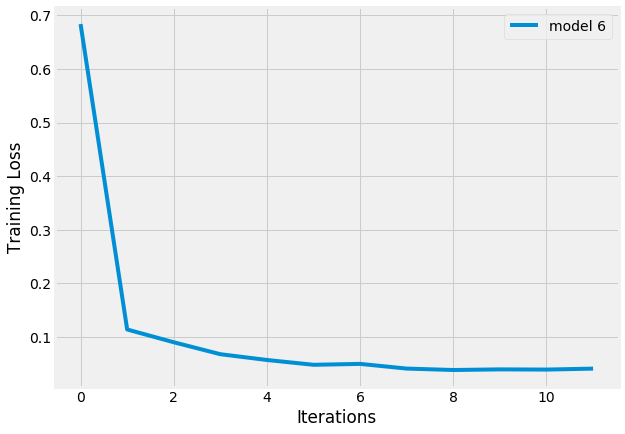

In [2]:
loss_list = [0.68377686, 0.11384684, 0.08996682, 0.06769182, 0.05690796, 0.04792570, 0.04962504, 0.04085470, 0.03821103, 0.03937470, 0.03900380, 0.04079786]
plt.figure(figsize=(9, 7))
plt.style.use('fivethirtyeight')
x_units = list(range(len(loss_list)))
plt.plot(x_units, loss_list, label='model 6')
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.legend()
plt.show()